In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns
import time
import matplotlib

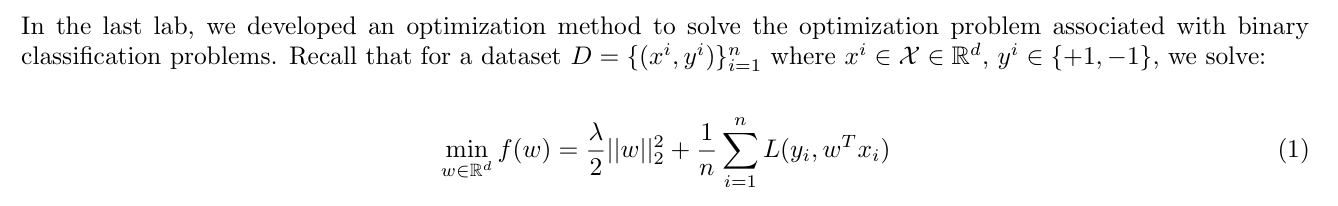

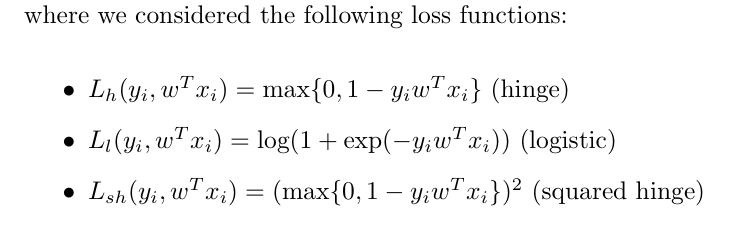

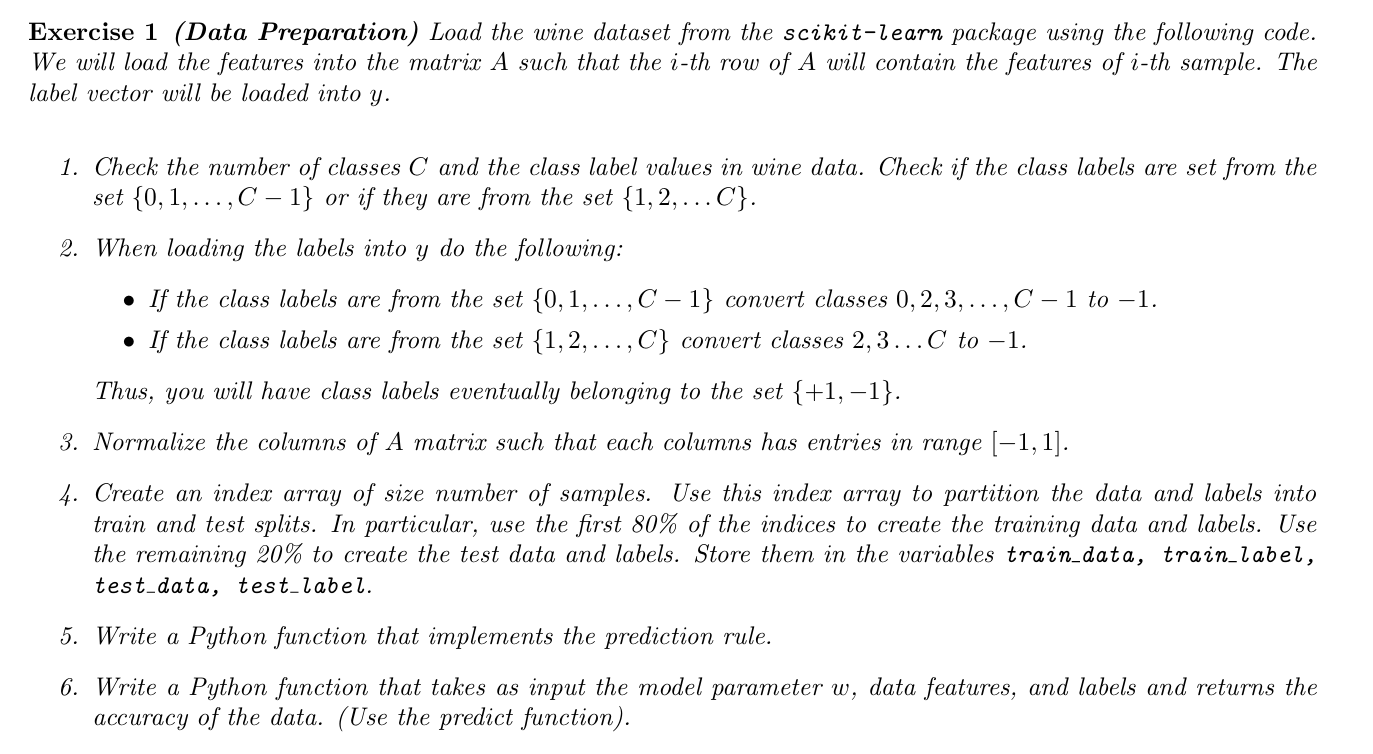

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
print(wine.data.shape)

(178, 13)


In [5]:
A = wine.data

In [6]:
print(wine.target.shape)

(178,)


In [7]:
n = wine.data.shape[0]
d = wine.data.shape[1]

Question 1. Find number of classes

In [8]:
np.unique(wine.target)

array([0, 1, 2])

It is of form [0,1,...C-1]. Number of classes are 3

Question 2: When loading the labels into y do the following:
 • If the class labels are from the set {0,1,...,C − 1} convert classes 0,2,3,...,C − 1 to −1.
 • If the class labels are from the set {1,2,...,C} convert classes 2,3...C to −1.




In [9]:
y = 1.0*np.ones([A.shape[0], ])
for i in range(wine.target.shape[0]):
  if wine.target[i] != 1:
    y[i]= -1

Question 3: Normalize the columns of A matrix such that each columns has entries in range [−1,1].

In [10]:
for j in range(A.shape[1]):
  # Find the maximum absolute value in each column
  max_abs_values = np.max(np.abs(A[:,j]))
  # Divide each element of the column by the maximum absolute value
  A[:,j] = A[:,j]/max_abs_values

In [11]:
A

array([[0.95954147, 0.29482759, 0.75232198, ..., 0.60818713, 0.98      ,
        0.63392857],
       [0.89008766, 0.30689655, 0.6625387 , ..., 0.61403509, 0.85      ,
        0.625     ],
       [0.88739042, 0.40689655, 0.82662539, ..., 0.60233918, 0.7925    ,
        0.70535714],
       ...,
       [0.89480782, 0.73793103, 0.6996904 , ..., 0.34502924, 0.39      ,
        0.49702381],
       [0.88806473, 0.44655172, 0.73374613, ..., 0.35087719, 0.405     ,
        0.5       ],
       [0.95279838, 0.70689655, 0.84829721, ..., 0.35672515, 0.4       ,
        0.33333333]])

Question 4: Create an index array of size number of samples. Use this index array to partition the data and labels into
 train and test splits. In particular, use the first 80% of the indices to create the training data and labels. Use
 the remaining 20% to create the test data and labels. Store them in the variables train
 data, train
 test
 data, test
 label.

In [12]:
#Create an index array
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices
# print(indexarr) #check indexarr after shuffling

#Use the first 80% of indexarr to create the train data and the remaining
p = int(0.8*len(indexarr))
train_data =  A[indexarr[:p]]
train_label = y[indexarr[:p]]
test_data = A[indexarr[p:]]
test_label = y[indexarr[p:]]

print("len of train data: ", len(train_data))
print("len of train target: ", len(train_label))
print("len of test data: ", len(test_data))
print("len of test target: ", len(test_label))

len of train data:  142
len of train target:  142
len of test data:  36
len of test target:  36


Question 5: Write a Python function that implements the prediction rule.
 label,


In [13]:
def predict(w,x):
  # for w^Tx = 0, since -1 is more I will bias it towards it -1
  if w@x <= 0:
    return -1
  if w@x >0:
    return 1

 Question 6. Write a Python function that takes as input the model parameter w, data features, and labels and returns the
 accuracy of the data. (Use the predict function).

In [14]:
def compute_accuracy(data, labels, model_w):
  #Use predict function defined above
  accuracy = 0.
  assert len(data) == len(labels)
  n = data.shape[0]
  for i in range(n):
    x = data[i]
    prediction = predict(model_w, x)
    if labels[i] == prediction:
      accuracy+=1
  return accuracy/n